<a href="https://colab.research.google.com/github/ShivinM-17/BirdCall-research-project/blob/main/BirdCall_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BirdCall Analysis using Reinforcement Learning

### Install and import the necessary modules

In [ ]:
!pip -q install tensorflow
!pip -q install gym
!pip -q install keras

In [ ]:
import numpy as np
import pandas as pd
from gym import Env
from gym.spaces import Discrete, Box
from collections import OrderedDict

In [ ]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline

### Load, check out and preprocess the data

In [ ]:
# Load the data
data = pd.read_csv("recordings_data.csv")
data.head()

,gen,sp,group,en,cnt,loc,lat,lng,alt,method,date,rmk
0,Prinia,lepida,birds,Delicate Prinia,India,"Vadhla Dam, Moti Kathechi, Surendranagar, Gujarat",22.9146,71.9718,10,field recording,2019-02-03,NaN
1,Prinia,lepida,birds,Delicate Prinia,India,"Harike wetlands, Talwandi Nepalan, Ferozepur, ...",31.1358,74.9525,220,field recording,2016-01-14,NaN
2,Ducula,cuprea,birds,Malabar Imperial Pigeon,India,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,field recording,2009-05-05,NaN
3,Ducula,cuprea,birds,Malabar Imperial Pigeon,India,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,field recording,2009-05-05,NaN
4,Prinia,lepida,birds,Delicate Prinia,India,"West of Chhari Lake, Kutch, Gujarat (1)",23.2610,69.2036,180,field recording,2013-01-30,"Same bird as on XC149603, calling in a very sm..."


In [ ]:
# Remove the unncessary columns
cols_to_remove = ['cnt', 'method', 'rmk', 'group']
data.drop(cols_to_remove, axis=1, inplace = True)
data.head()

,gen,sp,en,loc,lat,lng,alt,date
0,Prinia,lepida,Delicate Prinia,"Vadhla Dam, Moti Kathechi, Surendranagar, Gujarat",22.9146,71.9718,10,2019-02-03
1,Prinia,lepida,Delicate Prinia,"Harike wetlands, Talwandi Nepalan, Ferozepur, ...",31.1358,74.9525,220,2016-01-14
2,Ducula,cuprea,Malabar Imperial Pigeon,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,2009-05-05
3,Ducula,cuprea,Malabar Imperial Pigeon,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,2009-05-05
4,Prinia,lepida,Delicate Prinia,"West of Chhari Lake, Kutch, Gujarat (1)",23.2610,69.2036,180,2013-01-30


In [ ]:
# Checking missing values in the data
data.isnull().sum()

gen      0
sp       0
en       0
loc      2
lat     10
lng     10
alt     82
date     0
dtype: int64

In [ ]:
# Check missing values in the 'loc' data column
data[data["loc"].isnull()]

,gen,sp,en,loc,lat,lng,alt,date
147,Megapodius,nicobariensis,Nicobar Megapode,NaN,NaN,NaN,30,2015-11-26
148,Megapodius,nicobariensis,Nicobar Megapode,NaN,NaN,NaN,30,2015-12-19


In [ ]:
data = data.dropna(subset=['loc', 'lat', 'lng'])
data.head()

,gen,sp,en,loc,lat,lng,alt,date
0,Prinia,lepida,Delicate Prinia,"Vadhla Dam, Moti Kathechi, Surendranagar, Gujarat",22.9146,71.9718,10,2019-02-03
1,Prinia,lepida,Delicate Prinia,"Harike wetlands, Talwandi Nepalan, Ferozepur, ...",31.1358,74.9525,220,2016-01-14
2,Ducula,cuprea,Malabar Imperial Pigeon,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,2009-05-05
3,Ducula,cuprea,Malabar Imperial Pigeon,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctu...",15.3750,74.2542,190,2009-05-05
4,Prinia,lepida,Delicate Prinia,"West of Chhari Lake, Kutch, Gujarat (1)",23.2610,69.2036,180,2013-01-30


In [ ]:
data.isnull().sum()

gen      0
sp       0
en       0
loc      0
lat      0
lng      0
alt     82
date     0
dtype: int64

In [ ]:
# Get unique values count for each column
data.nunique()

gen      26
sp       45
en       45
loc     240
lat     249
lng     246
alt      83
date    303
dtype: int64

In [ ]:
# Check unique values of `gen`, `sp` and 'en'
for col in ['gen', 'sp', 'en']:
    print(f"{col} has {data[col].nunique()} unique values.\n{data[col].unique().tolist()}\n")

gen has 26 unique values.
['Prinia', 'Ducula', 'Chloropsis', 'Dendrocygna', 'Anser', 'Sarkidiornis', 'Tadorna', 'Nettapus', 'Spatula', 'Mareca', 'Anas', 'Aythya', 'Mergus', 'Arborophila', 'Lerwa', 'Ithaginis', 'Tragopan', 'Lophophorus', 'Pucrasia', 'Catreus', 'Lophura', 'Pavo', 'Galloperdix', 'Polyplectron', 'Bambusicola', 'Gallus']

sp has 45 unique values.
['lepida', 'cuprea', 'moluccensis', 'bicolor', 'javanica', 'indicus', 'anser', 'albifrons', 'melanotos', 'tadorna', 'ferruginea', 'coromandelianus', 'querquedula', 'clypeata', 'strepera', 'penelope', 'poecilorhyncha', 'platyrhynchos', 'acuta', 'crecca', 'albogularis', 'ferina', 'merganser', 'torqueola', 'mandellii', 'rufogularis', 'atrogularis', 'lerwa', 'cruentus', 'melanocephalus', 'satyra', 'blythii', 'temminckii', 'impejanus', 'sclateri', 'macrolopha', 'wallichii', 'leucomelanos', 'cristatus', 'spadicea', 'lunulata', 'bicalcaratum', 'fytchii', 'gallus', 'sonneratii']

en has 45 unique values.
['Delicate Prinia', 'Malabar Imperi

#### Splitting the location column to city area and state columns

In [ ]:
states_of_india = [
    "Andaman and Nicobar Islands",
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chandigarh",
    "Chhattisgarh",
    "Dadra and Nagar Haveli",
    "Daman and Diu",
    "Delhi",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jammu and Kashmir",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Ladakh",
    "Lakshadweep",
    "Madhya Pradesh",
    "Maharashtra",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Puducherry",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Telangana",
    "Tripura",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal"
]


In [ ]:
# Getting the location area regions and the state data from dataframe
loc_area = []
state_data = []

for st_data in data["loc"]:
  if type(st_data) is not float:
    idx = -1
    splt_data = list(st_data.split(","))
    flag = False

    # Appending state of india from the column data
    for index, dta in enumerate(splt_data):
      dta = dta.strip()
      if dta in states_of_india:
        flag = True
        state_data.append(dta)
        idx = index
        break
    if not flag:
      state_data.append(None)

    # Appending location area from the column data
    loc_area.append(None if idx==-1 else ",".join(splt_data[:idx]))

In [ ]:
state_data, len(state_data)

(['Gujarat',
  'Punjab',
  'Goa',
  'Goa',
  None,
  None,
  None,
  None,
  'Kerala',
  'Kerala',
  'Mizoram',
  'Kerala',
  'Kerala',
  'Kerala',
  'Rajasthan',
  None,
  'Goa',
  None,
  'Assam',
  'Kerala',
  'Karnataka',
  'West Bengal',
  'West Bengal',
  'Tamil Nadu',
  'Tamil Nadu',
  'Tamil Nadu',
  'Andaman and Nicobar Islands',
  'Andaman and Nicobar Islands',
  'Andaman and Nicobar Islands',
  'Goa',
  'Andaman and Nicobar Islands',
  'Andaman and Nicobar Islands',
  'Rajasthan',
  'Rajasthan',
  'Kerala',
  'Rajasthan',
  'Kerala',
  'Goa',
  None,
  'Goa',
  'Maharashtra',
  'Kerala',
  'Maharashtra',
  'Maharashtra',
  'Goa',
  'Himachal Pradesh',
  'Assam',
  'Rajasthan',
  'Assam',
  'Rajasthan',
  'Rajasthan',
  'Rajasthan',
  'Assam',
  'Assam',
  'Rajasthan',
  'Gujarat',
  'Punjab',
  None,
  'Assam',
  'Rajasthan',
  None,
  'Assam',
  'Assam',
  'Assam',
  'Assam',
  'West Bengal',
  None,
  'Rajasthan',
  'Rajasthan',
  'Gujarat',
  None,
  'West Bengal',
  'Goa

In [ ]:
# Add these data to main data
data["location"] = loc_area
data["state"] = state_data

# Remove the "loc" column from the data
data.drop("loc", axis=1, inplace = True)

In [ ]:
data.head()

,gen,sp,en,lat,lng,alt,date,location,state
0,Prinia,lepida,Delicate Prinia,22.9146,71.9718,10,2019-02-03,"Vadhla Dam, Moti Kathechi, Surendranagar",Gujarat
1,Prinia,lepida,Delicate Prinia,31.1358,74.9525,220,2016-01-14,"Harike wetlands, Talwandi Nepalan, Ferozepur",Punjab
2,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,2009-05-05,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa
3,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,2009-05-05,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa
4,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,2013-01-30,None,None


In [ ]:
data.shape

(490, 9)

In [ ]:
data.isnull().sum()

gen           0
sp            0
en            0
lat           0
lng           0
alt          82
date          0
location    102
state       102
dtype: int64

#### Handling missing values of the `alt` altitude column

In [ ]:
# Function to replace first upcoming None value to val
def replace_val(lst: list, val):
  for idx, i in enumerate(lst):
    if i is None:
      lst[idx] = val
      break

# Function to get the average of the list
def get_average(lst):
  return int(sum([i for i in lst if i is not None])/len(lst))

In [ ]:
from math import isnan
alt_lst = {}

# Get list of altitudes for each species
# This will be used to calculate the average altitude for that particular species
# Average altitude will be inputed into the missing values in the column `alt` with some noise
for idx in range(len(data)):
  dt = data.iloc[idx]
  if dt['sp'] in alt_lst:
    val = int(dt['alt']) if (dt['alt']!='?' and not isnan(float(dt['alt']))) else None
    alt_lst[dt['sp']]['alt_lst'].append(val)
  else:
    val = int(dt['alt']) if (dt['alt']!='?' and not isnan(float(dt['alt']))) else None
    alt_lst[dt['sp']] = {}
    alt_lst[dt['sp']]['alt_lst'] = [val]

In [ ]:
# Now, find the average altitude for each bird
for sps in alt_lst:
  # Get count of None values
  nn_vals = alt_lst[sps]['alt_lst'].count(None)  # None value count
  nn_sps = len(alt_lst[sps]['alt_lst'])  # length of the altitude list of each species

  # If, no None values, then continue
  if nn_vals == 0:
    alt_lst[sps]['to_rmv'] = False
    alt_lst[sps]['has_none'] = False
    alt_lst[sps]['av_alt'] = get_average(alt_lst[sps]['alt_lst'])
    continue

  alt_lst[sps]['has_none'] = True

  # If ratio of ( length of alt list / total None count ) <= 2
  # Then make remove those species (if total length < 5)
  # (if total length >= 5) then impute average on None, with some noise in it
  if round(nn_sps / nn_vals) < 2:
    alt_lst[sps]['av_alt'] = -1  # set average altitude as -1
    alt_lst[sps]['to_rmv'] = True  # set to_remove parameter as True

  else:
    alt_lst[sps]['av_alt'] = get_average(alt_lst[sps]['alt_lst'])  # get the average altitude
    alt_lst[sps]['to_rmv'] = False  # set to_remove parameter as False

In [ ]:
# Print out the alt_lst
for sps in alt_lst:
  print(f"Species: {sps}")
  print(f"Altitude list: {alt_lst[sps]['alt_lst']}")
  print(f"Average altitude: {alt_lst[sps]['av_alt']}")
  print(f"To remove: {alt_lst[sps]['to_rmv']}")
  print(f"Has none values: {alt_lst[sps]['has_none']}")
  print()

Species: lepida
Altitude list: [10, 220, 180, 180, None, None, 170, 50, 60, 60]
Average altitude: 93
To remove: False
Has none values: True

Species: cuprea
Altitude list: [190, 190, 60, 60, None, None, 650, 380, 140, 170, 650, 500]
Average altitude: 249
To remove: False
Has none values: True

Species: moluccensis
Altitude list: [800]
Average altitude: 800
To remove: False
Has none values: False

Species: bicolor
Altitude list: [30, 30, 0]
Average altitude: 20
To remove: False
Has none values: False

Species: javanica
Altitude list: [0, None, None, 20, 0, 0, None, None, 10, 180, 10, 10, 10, 6, 0, 10, 220, 360, 0]
Average altitude: 44
To remove: False
Has none values: True

Species: indicus
Altitude list: [420, 90, 300, 90, 170, 480, 480, 90, 90, 170, 130, 200]
Average altitude: 225
To remove: False
Has none values: False

Species: anser
Altitude list: [30, 90, 180, 220, 70, 70, 70, 70, 50, 70, 180, 180]
Average altitude: 106
To remove: False
Has none values: False

Species: albifrons
A

In [ ]:
# Now, inpute the 'None' values for each species with the average altitude with some noise
import random
for sps in alt_lst:
  # Ignore the species that are to be removed
  if alt_lst[sps]['to_rmv']:
    continue

  nn_val_ct = alt_lst[sps]['alt_lst'].count(None)

  # Impute average altitude with noise to missing values
  for i in range(nn_val_ct):
    noise = int(random.uniform(0, 0.35) * alt_lst[sps]['av_alt'])
    val_to_impute = eval(f"{alt_lst[sps]['av_alt']} {random.choice(['-', '+'])} {noise}")
    replace_val(alt_lst[sps]['alt_lst'], val_to_impute)

  # Now, set the has_none parameter to False
  alt_lst[sps]['has_none'] = False

In [ ]:
# Print out the alt_lst
for sps in alt_lst:
  print(f"Species: {sps}")
  print(f"Altitude list: {alt_lst[sps]['alt_lst']}")
  print(f"Average altitude: {alt_lst[sps]['av_alt']}")
  print(f"To remove: {alt_lst[sps]['to_rmv']}")
  print(f"Has none values: {alt_lst[sps]['has_none']}")
  print()

Species: lepida
Altitude list: [10, 220, 180, 180, 92, 114, 170, 50, 60, 60]
Average altitude: 93
To remove: False
Has none values: False

Species: cuprea
Altitude list: [190, 190, 60, 60, 231, 238, 650, 380, 140, 170, 650, 500]
Average altitude: 249
To remove: False
Has none values: False

Species: moluccensis
Altitude list: [800]
Average altitude: 800
To remove: False
Has none values: False

Species: bicolor
Altitude list: [30, 30, 0]
Average altitude: 20
To remove: False
Has none values: False

Species: javanica
Altitude list: [0, 45, 39, 20, 0, 0, 29, 54, 10, 180, 10, 10, 10, 6, 0, 10, 220, 360, 0]
Average altitude: 44
To remove: False
Has none values: False

Species: indicus
Altitude list: [420, 90, 300, 90, 170, 480, 480, 90, 90, 170, 130, 200]
Average altitude: 225
To remove: False
Has none values: False

Species: anser
Altitude list: [30, 90, 180, 220, 70, 70, 70, 70, 50, 70, 180, 180]
Average altitude: 106
To remove: False
Has none values: False

Species: albifrons
Altitude li

In [ ]:
# Get the species name with the 'to_remove' parameter as true
sps_to_rmv = [sps for sps in alt_lst if alt_lst[sps]['to_rmv']]
print(sps_to_rmv)

# Remove the rows
data_prp = data[~data['sp'].isin(sps_to_rmv)]

['crecca', 'albogularis', 'ferina', 'cruentus']


In [ ]:
# Now, replace the imputed altitude values in the main dataset
for sps in alt_lst:
  if sps not in sps_to_rmv:
    data_prp.loc[data_prp['sp']==sps, 'alt'] = alt_lst[sps]['alt_lst']

In [ ]:
# Convert values in 'alt' column to numeric format (int or float)
data_prp['alt'] = pd.to_numeric(data_prp['alt'], errors='coerce')

In [ ]:
data_prp.isnull().sum()

gen          0
sp           0
en           0
lat          0
lng          0
alt          0
date         0
location    96
state       96
dtype: int64

In [ ]:
data_prp.shape

(478, 9)

In [ ]:
data_prp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gen       478 non-null    object 
 1   sp        478 non-null    object 
 2   en        478 non-null    object 
 3   lat       478 non-null    float64
 4   lng       478 non-null    float64
 5   alt       478 non-null    int64  
 6   date      478 non-null    object 
 7   location  382 non-null    object 
 8   state     382 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.3+ KB


#### Handling the missing locations

In [ ]:
data_prp[data_prp['location'].isnull()]

,gen,sp,en,lat,lng,alt,date,location,state
4,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,2013-01-30,None,None
5,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,2013-01-30,None,None
6,Prinia,lepida,Delicate Prinia,23.1359,71.7451,92,2011-12-30,None,None
7,Prinia,lepida,Delicate Prinia,27.6167,95.5501,114,0000-00-00,None,None
15,Ducula,cuprea,Malabar Imperial Pigeon,15.2514,74.2411,380,2014-11-23,None,None
...,...,...,...,...,...,...,...,...,...
481,Gallus,sonneratii,Grey Junglefowl,13.3470,74.7890,117,2011-05-04,None,None
482,Gallus,sonneratii,Grey Junglefowl,13.3470,74.7890,117,2010-02-28,None,None
488,Gallus,sonneratii,Grey Junglefowl,17.9306,73.5988,750,2011-03-18,None,None
492,Gallus,sonneratii,Grey Junglefowl,10.1080,76.7130,50,2017-11-12,None,None


In [ ]:
!pip install geopy

In [ ]:
# importing modules
from geopy.geocoders import Nominatim

# calling the nominatim tool
geoLoc = Nominatim(user_agent="GetLoc")

# passing the coordinates and language parameter
locname = geoLoc.reverse("12.8387424, 80.1540219", language="en")

# printing the address/location name
print(locname.address)

Vandalur - Mambakkam - Kelambakkam Road, Kolapakkam, Tiruporur, Chengalpattu, Chengalpattu District, Tamil Nadu, 600127, India


In [ ]:
# importing modules
from geopy.geocoders import Nominatim

# calling the nominatim tool
geoLoc = Nominatim(user_agent="GetLoc")

# Make a list of location names and state, which will be replaced with the missing values
loc_lst = []
state_lst = []

for idx in range(len(data_prp[data_prp['location'].isnull()])):
  latitude = data_prp[data_prp['location'].isnull()].iloc[idx]['lat']
  longitude = data_prp[data_prp['location'].isnull()].iloc[idx]['lng']
  loc_addr = f"{latitude}, {longitude}"

  loc_name = geoLoc.reverse(loc_addr, language="en")
  print(loc_name)

  # Get the state and the location
  dt = str(loc_name).split(",")
  for i, plc in enumerate(dt):
    plc = plc.strip()
    if plc in states_of_india:
      loc_lst.append("".join(dt[:i]))
      state_lst.append(plc)
      break

Rampar Roha, Abdasa Taluka, Kachchh, Gujarat, 370615, India
Rampar Roha, Abdasa Taluka, Kachchh, Gujarat, 370615, India
Kachchh, Gujarat, India
Doom Dooma, Tinsukia District, Assam, 786153, India
Zuna, Patiem, Sanguem, South Goa District, Goa, India
Vainguinim, Satari, North Goa District, Goa, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
SH18, Dasada, Dasada Taluka, Surendranagar District, Gujarat, 382750, India
Sultanpur National Park, SH15A, Farrukhnagar, Gurugram District, Haryana, 122506, India
Patdi, Dasada Taluka, Surendranagar District, Gujarat, 382765, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
Dujkheda, Yawal, Jalgaon District, Maharashtra, 425203, India
Dujkheda, Yawal, Jalgaon District, Maharashtra, 425203, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
Saldi, Lilia Taluka, Amreli District, Gujarat, India
Saldi, Lilia Taluka, Amr

In [ ]:
# Replace the missing location and states with the above data
data_prp.loc[data_prp['location'].isnull(), 'location'] = loc_lst
data_prp.loc[data_prp['state'].isnull(), 'state'] = state_lst

In [ ]:
data_prp.isnull().sum()

gen         0
sp          0
en          0
lat         0
lng         0
alt         0
date        0
location    0
state       0
dtype: int64

#### Save the preprocessed dataset

In [ ]:
data_prp.to_csv("birdcall_final_data.csv")

In [ ]:
from gym import Env
import pandas as pd
from gym.spaces import Discrete, Box
import numpy as np
import random
import time
import math

In [ ]:
data = pd.read_csv("/content/bird_with_aqi.csv")

In [ ]:
data.head(10)

,Unnamed: 0,gen,sp,en,lat,lng,alt,date,location,state,aqi
0,0,Prinia,lepida,Delicate Prinia,22.9146,71.9718,10,03-02-2019,"Vadhla Dam, Moti Kathechi, Surendranagar",Gujarat,137
1,1,Prinia,lepida,Delicate Prinia,31.1358,74.9525,220,14-01-2016,"Harike wetlands, Talwandi Nepalan, Ferozepur",Punjab,142
2,2,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,05-05-2009,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa,46
3,3,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,05-05-2009,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa,46
4,4,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,30-01-2013,Rampar Roha Abdasa Taluka Kachchh,Gujarat,137
5,5,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,30-01-2013,Rampar Roha Abdasa Taluka Kachchh,Gujarat,137
6,6,Prinia,lepida,Delicate Prinia,23.1359,71.7451,121,30-12-2011,Kachchh,Gujarat,137
7,7,Prinia,lepida,Delicate Prinia,27.6167,95.5501,63,0000-00-00,Doom Dooma Tinsukia District,Assam,89
8,8,Ducula,cuprea,Malabar Imperial Pigeon,10.1274,76.7546,60,03-02-2016,"Thattekad Bird Sanctuary--Urulanthanni, Idukki...",Kerala,91
9,9,Ducula,cuprea,Malabar Imperial Pigeon,10.1274,76.7546,60,01-02-2016,"Thattekad Bird Sanctuary--Urulanthanni, Idukki...",Kerala,91


In [ ]:
data.isnull().sum()

Unnamed: 0    0
gen           0
sp            0
en            0
lat           0
lng           0
alt           0
date          0
location      0
state         0
aqi           0
dtype: int64

### Creating a mapping of India (to be used in the environment)

1) Function to create a mapping grid of the Indian map
- We will divide the map, into a grid of 109 columns and 108 rows
- Each cell will have a change in latitude and longitude of about 0.27 degrees
- Thus, for each change of 0.27 degrees in any direction (NSEW), there will be a change in distance of approx. 30km (amounting to 30 sq. km.)

2) For each cell, we will do the below processing
- Each cell will be divided into 10 columns and 10 rows
- Thus, a change of 0.09 degrees will happen in each sub-cell, amounting to change of about 10km each cell (10 sq. km. area)
- For each sub-cell, AQI will be calculated using the mid-point (latitude and longitude positions) of it.

3) With the AQI index for each sub-cell, average will be calculated and that average will be considered for that whole cell

4) NOTE - checking for areas outside and inside of India
- First, for each cell, we'll check the count of sub-cell that are outside India.
- This will be compared with the sub-cell within India
- If count within India > outside India, then we take the average of the whole cell for the AQI
- Else, we make the AQI of the whole cell as -1

#### Load the shapefiles

In [ ]:
# Unzip the shape file data
!unzip /content/India_Shapefile_With_Kashmir.zip

Archive:  /content/India_Shapefile_With_Kashmir.zip
   creating: India Shape/
  inflating: India Shape/india_ds.dbf  
  inflating: India Shape/india_ds.shp  
  inflating: India Shape/india_ds.shx  
  inflating: India Shape/india_st.dbf  
  inflating: India Shape/india_st.shp  
  inflating: India Shape/india_st.shx  


In [ ]:
import geopandas as gpd

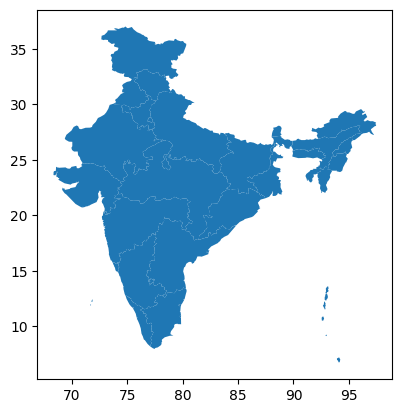

In [ ]:
shapefile_path = '/content/India Shape/india_st.shp'
india = gpd.read_file(shapefile_path)
india.plot()
plt.show()

#### Convert it into a numpy matrix of shape 109 x 108

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 61.1 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import rasterio
from rasterio.transform import from_origin
from rasterio.features import geometry_mask
import numpy as np

In [ ]:
# Read the shapefile
shapefile_path = '/content/India Shape/india_st.shp'
gdf = gpd.read_file(shapefile_path)
gdf

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,GOA,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


In [ ]:
# Read the shapefile
india_shapefile = gpd.read_file(shapefile_path)

# Get the bounding box of the shapefile
minx, miny, maxx, maxy = india_shapefile.total_bounds

# Calculate the raster width and height
width = 109  # Number of columns
height = 108  # Number of rows

# Calculate the pixel size in the x and y directions
pixel_width = (maxx - minx) / width
pixel_height = (maxy - miny) / height

# Create transformation parameters
transform = from_origin(minx, maxy, pixel_width, pixel_height)

# Create the mask for Indian territory
mask = geometry_mask(india_shapefile.geometry, out_shape=(height, width), transform=transform, invert=True)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Convert the mask to uint8
mask = mask.astype(np.uint8)

# Create the raster file
with rasterio.open('india_raster.tif', 'w', driver='GTiff', width=width, height=height, count=1, dtype=np.uint8,
                   crs=india_shapefile.crs, transform=transform) as dst:
    dst.write(mask, 1)

# Read the raster image
with rasterio.open('india_raster.tif') as src:
    india_raster = src.read(1)

# Display the numpy array
print(india_raster)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
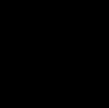

In [ ]:
india_raster

In [ ]:
type(india_raster), india_raster[0]

(numpy.ndarray,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=uint8))

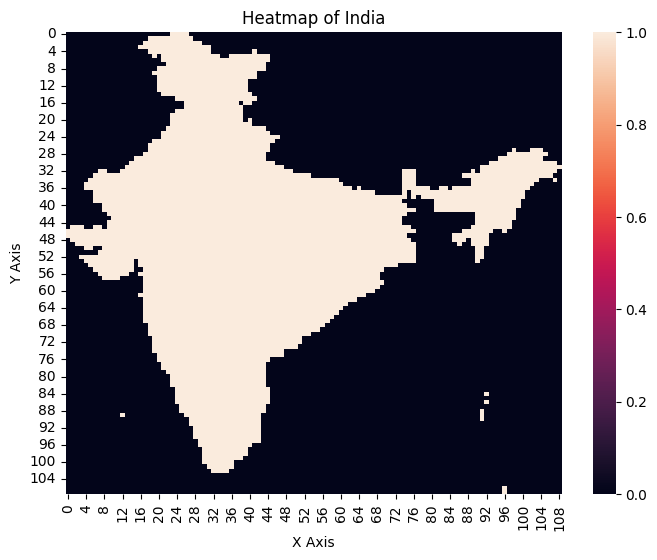

In [ ]:
# Plot the grid acquired from the shapefile
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(india_raster)
plt.title('Heatmap of India')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

#### Map the AQI indexes on the matrix

In [ ]:
!pip -q install ozon3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import ozon3 as ooo

o3 = ooo.Ozon3('d08d2273e4e62f8e1ecf0d83f050d6d107239611')
data = o3.get_coordinate_air(lat = 16.640499,
                             lon = 69.049052)
data

,city,latitude,longitude,station,dominant_pollutant,timestamp,timestamp_timezone,aqi,AQI_meaning,AQI_health_implications,...,o3,co,no2,so2,dew,h,p,t,w,wg
0,NaN,18.897756,72.81332,"Navy Nagar-Colaba, Mumbai, India",pm2.5,2024-05-30 14:00:00,+05:30,74.0,Moderate,"Air quality is acceptable; however, for some p...",...,19.5,5.6,18.8,2.5,24.5,60.5,1005.5,33.0,NaN,8.7


In [ ]:
data['station']

0    Navy Nagar-Colaba, Mumbai, India
Name: station, dtype: object

In [ ]:
data['aqi']!=None

0    True
Name: aqi, dtype: bool

In [ ]:
# Get the range of latitude and longitude for India
lat_range = [8.07, 37.10]  # Both in North
long_range = [68.12, 97.42]  # Both in East direction

In [ ]:
# Get the mapping of India done before
MAPPED_AQI_MATRIX = india_raster
MAPPED_STATE_MATRIX = india_raster

In [ ]:
!pip install retrying

In [ ]:
from retrying import retry

In [ ]:
# Make a function to calculate the average AQI of the cell using its sub-cells
@retry(stop_max_attempt_number=3, wait_fixed=1000)
def get_avg_aqi(lat_start: float, lat_end: float,  # take the start and end values of latitude and longitude
                lng_start: float, lng_end: float):

  # Access token for the package
  o3 = ooo.Ozon3('d08d2273e4e62f8e1ecf0d83f050d6d107239611')

  # Get the mid of latitude and longitude
  mid_lat = float((lat_start + lat_end)/2)
  mid_lng = float((lng_start + lng_end)/2)

  # Get the location
  location = geoLoc.reverse(f"{np.round(mid_lat,2)}, {np.round(mid_lng, 2)}", language="en")
  time.sleep(1)

  # Check if we get any data from location or not
  # if location == None:
  #   return 0

  # Now, get data using the latitude and longitude
  try:
    data = o3.get_coordinate_air(lat = np.round(mid_lat,3),
                                 lon = np.round(mid_lng, 3))
  except Exception as e:
    print("[INFO] Couldn't parse the data, error in getting the data.")
    return -1

  # Check if the location is in India or not
  # flag = True if 'India' in str(data['station']) else False

  return data['aqi']
  # else: return 0

In [ ]:
# # Make a function to calculate the average AQI of the cell using its sub-cells
# @retry(stop_max_attempt_number=3, wait_fixed=500)
# def get_avg_aqi(lat_start: float, lat_end: float,  # take the start and end values of latitude and longitude
#                 lng_start: float, lng_end: float,
#                 return_matrix = False):

#   # Access token for the package
#   o3 = ooo.Ozon3('d08d2273e4e62f8e1ecf0d83f050d6d107239611')

#   # Create a 3x3 matrix, to store AQI index for each sub-cell
#   sub_cell_mat = np.zeros((3, 3))

#   # Make variables to check if the city is in India or outside it
#   out_india = 0
#   in_india = 0
#   ct = 0

#   ## Loop through each column of the matrix
#   for col_ind, lng in enumerate(np.arange(lng_start, lng_end, 0.09)):

#     if col_ind>2: break

#     # Loop through each row of the matrix
#     for row_ind, lat in enumerate(np.arange(lat_start, lat_end, 0.09)):

#       if row_ind>2: break
#       time.sleep(1)

#       # Get the location
#       location = geoLoc.reverse(f"{np.round(lat,2)}, {np.round(lng, 2)}", language="en")
#       if location == None:
#         sub_cell_mat[col_ind, row_ind] = 0
#         continue

#       # Now, get data using the latitude and longitude
#       data = o3.get_coordinate_air(lat = np.round(lat,2), lon =np.round(lng, 2))
#       # print(data)

#       # Check if the location is in India or not
#       flag = True if 'India' in str(data['station']) else False

#       # Update the counts
#       if flag: in_india += 1
#       else: out_india += 1

#       # Store the AQI index from the data
#       sub_cell_mat[col_ind, row_ind] = data['aqi']

#       ct += 1
#       print(f"[INFO] SUB-CELL NO. {ct} SUCCESSFULLY FILLED.")

#   print("[INFO] CELL FILLED SUCCESSFULLY.")
#   net_aqi = np.mean(sub_cell_mat) if in_india >= out_india else -1
#   if net_aqi == 0: net_aqi = -1
#   return net_aqi if not return_matrix else sub_cell_mat

In [ ]:
lt = get_avg_aqi(8.34 +21.6, 8.61+21.6, 68.12+21.6, 68.39+21.6)
print(lt)

0    38.0
Name: aqi, dtype: float64


Creating the AQI index mapping on the Indian mapping

In [ ]:
# Loop through each column of the matrix (along the longitude)
import time
ct = 30
i = 30
for col_ind, lng in enumerate(np.arange(long_range[0] + 0.27*ct, long_range[1], 0.27)):
  if col_ind >= 108: break

  start_time = time.time()

  # Loop through each row of the matrix (along the latitude)
  for row_ind, lat in enumerate(np.arange(lat_range[0], lat_range[1], 0.27)):
    if row_ind > 107: break

    # Check if the cell is inside of india or not
    if MAPPED_AQI_MATRIX[col_ind+ct, row_ind]==0: continue

    # Calculate the average AQI value using latitude and longitude
    aqi = get_avg_aqi(lat_start = lat, lat_end = lat+0.27,
                      lng_start = lng, lng_end = lng+0.27)

    if aqi==-1: aqi = (MAPPED_AQI_MATRIX[col_ind+ct-1,
                                         row_ind] + MAPPED_AQI_MATRIX[col_ind+ct,
                                                                      row_ind-1] + MAPPED_AQI_MATRIX[col_ind+ct-1,
                                                                                                   row_ind-1])/3

    MAPPED_AQI_MATRIX[col_ind+ct,row_ind] = aqi
    print(f"[INFO] CELL NUMBER {row_ind} FILLED.")
    print("---------------------------------------")

  end_time = time.time()

  # Save every time a column has been made
  np.save(f'mapped_aqi_matrix_{i}.npy', MAPPED_AQI_MATRIX)
  print(f"[INFO] COLUMN INDEX {col_ind+1+ct} HAS BEEN MADE.")
  print(f"[INFO] TIME TAKEN TO MAKE THE ROW: {np.round(end_time-start_time,2)}  SECONDS.")
  print("--------------------------------------------------------")
  i += 1

In [ ]:
MAPPED_AQI_MATRIX[32]

array([  0,   0,   0,   0,   0,   0,   0,  71,  71,   0,   0,   0,  63,
        63,  63,  77,  84,  84,  84,  66,  66,  75,  20,  20,  20,  20,
        73,  73, 104, 104, 104, 110, 110, 172, 172, 172, 172, 172, 172,
       172, 133,  51,  51,  51,  51,  51,  51,  51,  83,  83,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 152, 154, 156,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156,   0,
       156, 156, 156, 156, 156,  88,  88,  88,  88,  59, 159, 159, 159,
       159, 159, 159, 159,   0], dtype=uint8)

In [ ]:
MAPPED_AQI_MATRIX = np.load("/content/final_aqi_mapped_india.npy")

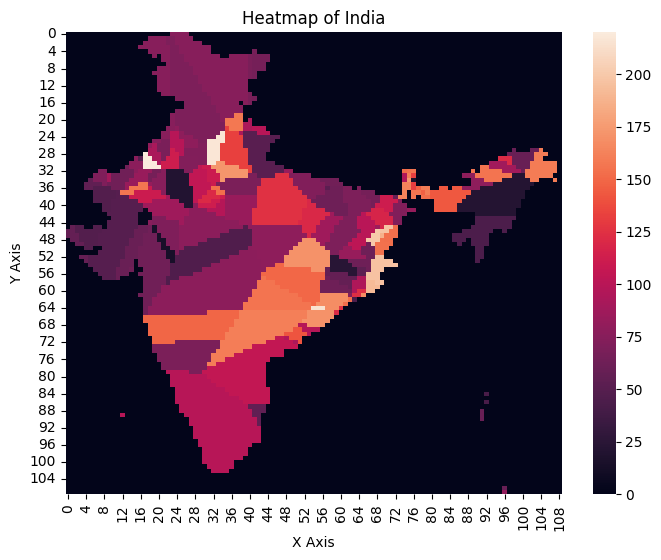

In [ ]:
# Plot the grid acquired from the shapefile
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(MAPPED_AQI_MATRIX)
plt.title('Heatmap of India')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show();

In [ ]:
type(MAPPED_AQI_MATRIX)

numpy.ndarray

In [ ]:
MAPPED_AQI_MATRIX.shape

(108, 109)

Creating the STATE location mapping on the Indian map

In [ ]:
# Making a encoding set dictionary for each state of india
encoded_state_dict = {k:i+1 for i,k in enumerate(states_of_india)}
encoded_state_dict

{'Andaman and Nicobar Islands': 1,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 3,
 'Assam': 4,
 'Bihar': 5,
 'Chandigarh': 6,
 'Chhattisgarh': 7,
 'Dadra and Nagar Haveli': 8,
 'Daman and Diu': 9,
 'Delhi': 10,
 'Goa': 11,
 'Gujarat': 12,
 'Haryana': 13,
 'Himachal Pradesh': 14,
 'Jammu and Kashmir': 15,
 'Jharkhand': 16,
 'Karnataka': 17,
 'Kerala': 18,
 'Ladakh': 19,
 'Lakshadweep': 20,
 'Madhya Pradesh': 21,
 'Maharashtra': 22,
 'Manipur': 23,
 'Meghalaya': 24,
 'Mizoram': 25,
 'Nagaland': 26,
 'Odisha': 27,
 'Puducherry': 28,
 'Punjab': 29,
 'Rajasthan': 30,
 'Sikkim': 31,
 'Tamil Nadu': 32,
 'Telangana': 33,
 'Tripura': 34,
 'Uttar Pradesh': 35,
 'Uttarakhand': 36,
 'West Bengal': 37}

In [ ]:
MAPPED_STATE_MATRIX = india_raster
MAPPED_STATE_MATRIX[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

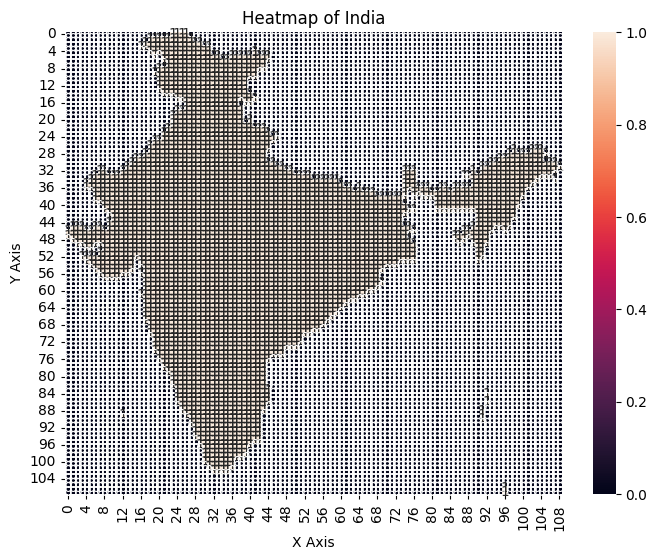

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(MAPPED_STATE_MATRIX, annot=True)
plt.title('Heatmap of India')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

In [ ]:
!pip install shapely

In [ ]:
import numpy as np
import pandas as pd
from shapely.geometry import Point

In [ ]:
state_data = {}
for i in range(len(gdf)):
  state_data[gdf.loc[i]['STATE']] = gdf.loc[i]['geometry']

state_data

{'ANDAMAN AND NICOBAR ISLANDS': <MULTIPOLYGON (((94.089 6.734, 93.977 6.949, 93.928 6.95, 93.922 7.098, 94.1...>,
 'ANDHRA PRADESH': <POLYGON ((82.001 17.954, 82.117 18.025, 82.24 17.992, 82.285 18.025, 82.365...>,
 'ARUNACHAL PRADESH': <POLYGON ((95.615 27.347, 95.692 27.339, 95.767 27.352, 95.967 27.369, 96.09...>,
 'ASSAM': <POLYGON ((92.822 25.578, 92.697 25.614, 92.484 25.769, 92.304 25.713, 92.24...>,
 'BIHAR': <POLYGON ((84.169 26.283, 83.914 26.385, 83.933 26.431, 84.037 26.463, 84.12...>,
 'CHANDIGARH': <POLYGON ((76.852 30.757, 76.853 30.706, 76.844 30.673, 76.681 30.69, 76.694...>,
 'DADRA AND NAGAR HAVELI': <POLYGON ((72.992 20.22, 72.962 20.289, 73.016 20.339, 73.19 20.32, 73.1 20....>,
 'DAMAN AND DIU': <MULTIPOLYGON (((72.869 20.322, 72.921 20.374, 72.965 20.455, 72.986 20.346,...>,
 'DELHI': <POLYGON ((76.922 28.786, 77.111 28.834, 77.162 28.829, 77.302 28.613, 77.31...>,
 'GOA': <POLYGON ((73.705 15.719, 73.835 15.772, 74.003 15.599, 74.083 15.661, 74.24...>,
 'GUJARAT

### Creating the overall environment

In [ ]:
class BirdCallEnv(Env):
  # Initialize the conditions
  def __init__(self, input_data, state_data, MAPPED_AQI_MATRIX):
    # Birds will go north, south, east, west
    # In 2D plane, it will mean, it goes up, down, right, left
    # Therefore, total 4 actions
    self.action_space = Discrete(4)
    self.get_step_idx = 0  # get row data index
    self.AQI_MATRIX = MAPPED_AQI_MATRIX  # get the mapped aqi matrix
    self.data = input_data

    # Only 3 features to consider - Latitude, Longitude, AQI
    self.observation_space = Box(low=0, high=3, shape=(3,), dtype=np.float32)

    self.reset()  # set the initial conditions for the parameters
    self.finish = False
    self.state_data = state_data

  def step(self, action):
    # If only, the training of that particular data is done, then we will move for next step
    if self.done:
      # When all rows are finished, the environment is also stopped, since no more data present
      if self.get_step_idx >= self.data.shape[0]:
        self.get_step_idx = 0
        return self.state + [self.coord_travel], reward, self.done, True

      self.get_step_idx += 1
      self.reset()
      self._set_parameters()

    # Now, take action
    self.take_action(int(action)) # with this, we'll get the new latitude and longitude

    # Now, test the action taken now, and get appropriate rewards
    reward = self.test_conditions()

    # return the new state and rewards
    # Here, new state will consist of [lat, lng, alt, coord_travel, reward]
    return self.state + [self.coord_travel], reward, self.done, False


  def take_action(self, action):
    ## 0 - go north, 1 - go south, 2 - go east, 3 - go west
    # If 0 or 1
    if action in [0, 1]:
      # Let one action distance be about 30km, which equals to change of abt 0.27 degrees in latitude
      self.curr_latitude = float(self.curr_latitude + 0.27) if action==0 else float(self.curr_latitude - 0.27)

    elif action in [2, 3]:
      # Same as latitude
      self.curr_longitude = float(self.curr_longitude + 0.27) if action==2 else float(self.curr_longitude - 0.27)

    # else:
    #   # Decrease or increase the altitude by abt 10-15m
    #   change = random.randint(10,15)
    #   if self.curr_altitude!=0:
    #     self.curr_altitude = int(self.curr_altitude + change) if action==4 else int(self.curr_altitude + change)

    print(f"Action taken: {action}")
    # Add the new coordinates to the travel list (will be used for rendering)
    if int(action) in [0, 1, 2, 3]:
      self.row_idx = math.floor(abs(self.curr_latitude-8.07)/0.27)
      self.col_idx = math.floor(abs(self.curr_longitude-68.12)/0.27)
      self.coord_travel.append((self.row_idx, self.col_idx))

    # let this be the new state
    self.state = [self.curr_latitude, self.curr_longitude, self.curr_altitude]

  def test_conditions(self):
    # Get the new indian state after taking action
    self.get_new_state()

    # First, get the aqi from the data
    self.aqi = float(self.data.loc[self.get_step_idx][['aqi']])

    if (self.curr_latitude <= 8.07 or self.curr_latitude >= 37.10) or (self.curr_longitude <= 68.12 or self.curr_longitude >= 97.42):
      # Set these parameters back to the starting point if they move out of this error
      self.curr_latitude, self.curr_longitude, self.curr_altitude, self.curr_state_loc = np.array(
        self.data.loc[self.get_step_idx][['lat', 'lng', 'alt', 'state']]
      )
      return -5

    if (self.coord_travel[-1][1]>107 or self.coord_travel[-1][0]>108):
      # Set these parameters back to the starting point if they move out of this error
      self.curr_latitude, self.curr_longitude, self.curr_altitude, self.curr_state_loc = np.array(
        self.data.loc[self.get_step_idx][['lat', 'lng', 'alt', 'state']]
      )
      return -5

    # get the aqi of the location
    loc_aqi = float(self.AQI_MATRIX[self.row_idx, self.col_idx])

    print(f"New aqi: {loc_aqi}")

    # check if the location is sea or outside india
    if loc_aqi == 0:
      return -4

    # We require the aqi index of the bird, to be within a specific range of aqi of the location aqi
    lower_limit = float(int(self.aqi) * 0.45)
    upper_limit = float(int(self.aqi) * 1.40)

    flag = (loc_aqi <= upper_limit and loc_aqi >= lower_limit)

    # Check if the location has changed or not
    if self.new_state_loc != self.curr_state_loc:
      # if within limits, then all good
      if flag:
        self.done = True
        return 7
      else:
        return 5
    else:
      return -2 if not flag else 2


  def _set_parameters(self):
    self.curr_latitude, self.curr_longitude, self.curr_altitude, self.curr_state_loc = np.array(
        self.data.loc[self.get_step_idx][['lat', 'lng', 'alt', 'state']]
    )

    # print(self.curr_state_loc)
    self.curr_state_loc = self.curr_state_loc.upper()
    # Add the initial coordinates to the coord_travel list
    row_idx = math.floor(abs(self.curr_latitude-8.07)/0.27)
    col_idx = math.floor(abs(self.curr_longitude-68.12)/0.27)
    self.coord_travel.append((row_idx, col_idx))

    # return as a list for the state list (only required parameters)
    return [self.curr_latitude, self.curr_longitude, self.curr_altitude]

  # Function to take out the new state location
  def get_new_state(self):
    # loc_addr = f"{np.round(self.curr_latitude,2)}, {np.round(self.curr_longitude,2)}"
    # loc_name = geoLoc.reverse(loc_addr, language="en")

    # if loc_name is None:
    #   pass

    new_pt = Point(self.curr_longitude, self.curr_latitude)
    flag = False
    for i in self.state_data:
      if self.state_data[i].contains(new_pt):
        self.new_state_loc = i;
        flag = True
        break;

    print(f"New state: {self.new_state_loc }")

    # for idx, plc in enumerate(str(loc_name).split(",")):
    #   plc = plc.strip()
    #   if plc in states_of_india:
    #     self.new_state_loc = plc
    #     break

  # reset and re-initialize the parameters
  def reset(self):
    self.state = []  # set initial state to [], since this will be taken from the data
    self.curr_longitude = None
    self.curr_latitude = None
    self.curr_altitude = None
    self.init_state_loc = None
    self.new_state_loc = None
    self.done = False
    self.coord_travel = []

  def render():
    pass  # isse baad mae dekhenge


### Creating the DQN agent

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D
from tensorflow.keras.optimizers import AdamW

In [ ]:
class DQNAgent:
    def __init__(self, state_dim, action_dim, lr=0.001, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.model = self.build_model()

    def build_model(self):
        model = Sequential([
            # Conv1D(input_shape = (self.state_dim,), filters=2, kernel_size = 3, activation="relu"),
            # MaxPool1D(pool_size=2, strides=1),
            Dense(64, activation="relu", input_shape = (self.state_dim,)),
            Dense(32, activation="relu"),
            # Conv1D(filters=2, kernel_size = 2, activation="relu"),
            # LSTM(64, input_shape=(self.state_dim, 1), activation='relu', return_sequences=True),  # LSTM layer
            # SimpleRNN(64, activation='relu'),  # Simple RNN layer
            Dense(16, activation="relu"),
            Dense(8, activation="relu"),
            Dense(self.action_dim, activation='linear')
        ])
        model.compile(optimizer=AdamW(learning_rate=self.lr), loss='mse', metrics=["mae", "mse"])
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(self.action_dim)
        else:
          actn = np.argmax(self.model.predict(state)[0])
          print(f"Action predicted: {actn}")
          return actn

    def train(self, state, action, reward, next_state, done):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        target = reward
        if not done:
            target = reward + self.gamma * np.argmax(self.model.predict(next_state)[0])

        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

### Running the overall system

In [ ]:
# Environment parameters
state_dim = 3
action_dim = 4
lr = 0.001
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01

In [ ]:
data = pd.read_csv("/content/bird_with_aqi.csv")

In [ ]:
data.head()

,Unnamed: 0,gen,sp,en,lat,lng,alt,date,location,state,aqi
0,0,Prinia,lepida,Delicate Prinia,22.9146,71.9718,10,03-02-2019,"Vadhla Dam, Moti Kathechi, Surendranagar",Gujarat,137
1,1,Prinia,lepida,Delicate Prinia,31.1358,74.9525,220,14-01-2016,"Harike wetlands, Talwandi Nepalan, Ferozepur",Punjab,142
2,2,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,05-05-2009,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa,46
3,3,Ducula,cuprea,Malabar Imperial Pigeon,15.3750,74.2542,190,05-05-2009,"Tambdi Surla, Bhagwan Mahaveer Wildlife Sanctuary",Goa,46
4,4,Prinia,lepida,Delicate Prinia,23.2610,69.2036,180,30-01-2013,Rampar Roha Abdasa Taluka Kachchh,Gujarat,137


In [ ]:
# Create the environment
env = BirdCallEnv(data, state_data, MAPPED_AQI_MATRIX)

In [ ]:
# Create the DQN agent
agent = DQNAgent(state_dim = state_dim, action_dim = action_dim,
                 lr = lr, gamma = gamma, epsilon = epsilon, epsilon_decay = epsilon_decay,
                 epsilon_min = epsilon_min)

In [ ]:
agent.model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 64)                256       
                                                                 
 dense_141 (Dense)           (None, 32)                2080      
                                                                 
 dense_142 (Dense)           (None, 16)                528       
                                                                 
 dense_143 (Dense)           (None, 8)                 136       
                                                                 
 dense_144 (Dense)           (None, 4)                 36        
                                                                 
Total params: 3036 (11.86 KB)
Trainable params: 3036 (11.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
env._set_parameters()

[22.9146, 71.9718, 10]

In [ ]:
for i in range(5):
  print(agent.act((1, 1, 0)))

1
0
3
0
0


In [ ]:
state = np.array([22.9146, 71.9718, 10])

# Reshape to match the input shape of the model
input_data = tf.expand_dims(state, axis=0)
input_data

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[22.9146, 71.9718, 10.    ]])>

In [ ]:
# Training parameters
num_episodes = 10
episode_reward_list = []
path_lst = []

# Make a action list, for model control and exchange
agent_model_lst = [agent.model.get_weights()]
epsilon_lst = []

# Main training loop
for episode in range(1, num_episodes + 1):

  # Set the initial parameters for the state
    state = env._set_parameters()
    episode_reward = 0
    per_ep_reward_list = []
    per_ep_path_lst = {}
    final = False
    per_ep_path_lst[episode]=[]
    step_num = 0

    action_lst = []

    while not final:
        # Get action from the agent
        action = agent.act(tf.expand_dims(state[:3], axis=0))
        action_lst.append(action)

        # Take action and get next state and reward
        next_state, reward, done, final = env.step(action)

        # Train the agent
        agent.train(tf.expand_dims(state[:3], axis=0), action, reward, tf.expand_dims(next_state[:3], axis=0), done)

        state = next_state
        episode_reward += reward

        per_ep_reward_list.append(episode_reward)
        flag = False

        if step_num%10==0:
          print(f"Current Episodic reward total: {episode_reward}")
          print(f"Step number: {step_num}")
          print(f"Action taken: {action}, reward received: {reward}")
          print(f"Latitude: {next_state[0]}, Longitude: {next_state[1]}")
          print(f"Done: {done}")

        if len(action_lst)>70 and len(set(action_lst[::-1][:40]))==1:
          agent.model.set_weights(agent_model_lst[-1])
          agent.epsilon = epsilon_lst[-1]
          flag = True
          print("[INFO] TRAINING PATH GOING WRONG, LOADING THE PREVIOUS MODELS SAVED WEIGHTS")

        if len(action_lst)>150:
          print(f"Current Episodic reward total: {episode_reward}")
          print(f"Step number: {step_num}")
          print(f"Action taken: {action}, reward received: {reward}")
          print(f"Latitude: {next_state[0]}, Longitude: {next_state[1]}")
          print(f"Done: {done}")
          per_ep_reward_list.append(episode_reward)
          env.get_step_idx += 1
          per_ep_path_lst[episode].append(result_data_per_record)
          action_lst = []
          continue

        if done:
          print(f"Current Episodic reward total: {episode_reward}")
          print(f"Step number: {step_num}")
          print(f"Action taken: {action}, reward received: {reward}")
          print(f"Latitude: {next_state[0]}, Longitude: {next_state[1]}")
          print(f"Done: {done}")
          per_ep_reward_list.append(episode_reward)
          print(f"Episode: {episode}, Step: {env.get_step_idx}, Reward: {episode_reward}")
          result_data_per_record = {"reward": episode_reward,
                                    "coord_travel": state[3:],
                                    "final_latitude": state[0],
                                    "final_longitude": state[1]}

          per_ep_path_lst[episode].append(result_data_per_record)
          print(result_data_per_record)

          if not flag:
            agent_model_lst.append(agent.model.get_weights())
            epsilon_lst.append(agent.epsilon)
          action_lst = []

        print("--------------------------------------------------")
        step_num+=1
    episode_reward_list.append(per_ep_reward_list)
    path_lst.append(per_ep_path_lst)

Streaming output truncated to the last 5000 lines.
New state: UTTAR PRADESH
New aqi: 0.0
1/1 [==============================] - 0s 30ms/step
[INFO] TRAINING PATH GOING WRONG, LOADING THE PREVIOUS MODELS SAVED WEIGHTS
--------------------------------------------------
1/1 [==============================] - 0s 31ms/step
Action predicted: 2
Action taken: 2
New state: UTTAR PRADESH
New aqi: 0.0
1/1 [==============================] - 0s 36ms/step
[INFO] TRAINING PATH GOING WRONG, LOADING THE PREVIOUS MODELS SAVED WEIGHTS
--------------------------------------------------
1/1 [==============================] - 0s 26ms/step
Action predicted: 2
Action taken: 2
New state: UTTAR PRADESH
New aqi: 0.0
1/1 [==============================] - 0s 29ms/step
[INFO] TRAINING PATH GOING WRONG, LOADING THE PREVIOUS MODELS SAVED WEIGHTS
--------------------------------------------------
1/1 [==============================] - 0s 34ms/step
Action predicted: 2
Action taken: 2
New state: UTTAR PRADESH
New aqi: 

KeyboardInterrupt: 

In [ ]:
MAPPED_AQI_MATRIX.shape

In [ ]:
env.get_step_idx

174

In [ ]:
per_ep_path_lst[1][0]

{'reward': 75,
 'coord_travel': [[(54, 14),
   (54, 14),
   (54, 13),
   (55, 13),
   (55, 14),
   (55, 15),
   (54, 15),
   (55, 15),
   (54, 15),
   (54, 16),
   (55, 16),
   (54, 16),
   (54, 17),
   (54, 18),
   (53, 18),
   (53, 19),
   (52, 19),
   (52, 20),
   (52, 21),
   (51, 21),
   (52, 21),
   (53, 21),
   (53, 22),
   (53, 21),
   (53, 22),
   (52, 22),
   (52, 23),
   (52, 24),
   (52, 25),
   (53, 25),
   (53, 24),
   (52, 24),
   (53, 24),
   (54, 24),
   (53, 24),
   (54, 24),
   (55, 24),
   (55, 23),
   (55, 22),
   (56, 22)]],
 'final_latitude': 23.4546,
 'final_longitude': 74.13179999999997}

### Plotting the coordinate traversal of different agents and also the reward distribution plot

#### Reward analysis plot

In [ ]:
per_ep_reward_list

[-2,
 -4,
 -2,
 -6,
 -10,
 -14,
 -18,
 -16,
 -20,
 -18,
 -16,
 -14,
 -12,
 -10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 6,
 11,
 16,
 21,
 26,
 31,
 36,
 41,
 46,
 51,
 56,
 61,
 66,
 68,
 75,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 122,
 122,
 127,
 125,
 123,
 128,
 133,
 138,
 143,
 148,
 153,
 158,
 163,
 168,
 173,
 178,
 183,
 188,
 193,
 198,
 203,
 208,
 213,
 218,
 223,
 228,
 233,
 238,
 243,
 248,
 253,
 258,
 263,
 270,
 270,
 268,
 266,
 264,
 262,
 260,
 258,
 263,
 261,
 259,
 257,
 255,
 253,
 251,
 249,
 247,
 245,
 243,
 241,
 239,
 237,
 233,
 231,
 229,
 234,
 239,
 244,
 249,
 254,
 259,
 264,
 269,
 274,
 279,
 284,
 289,
 294,
 299,
 304,
 309,
 314,
 319,
 324,
 329,
 334,
 339,
 344,
 349,
 354,
 359,
 364,
 369,
 374,
 379,
 384,
 389,
 394,
 399,
 404,
 409,
 414,
 419,
 424,
 429,
 434,
 439,
 444,
 449,
 454,
 459,
 464,
 469,
 474,
 479,
 484,
 489,
 494,
 499,
 504,
 509,
 514,
 51

In [ ]:
import json
# Save the list to a JSON file
with open('numbers.json', 'w') as f:
    json.dump(per_ep_reward_list, f)

In [ ]:
# Load the list from the JSON file
with open('numbers.json', 'r') as f:
    reward_lst = json.load(f)

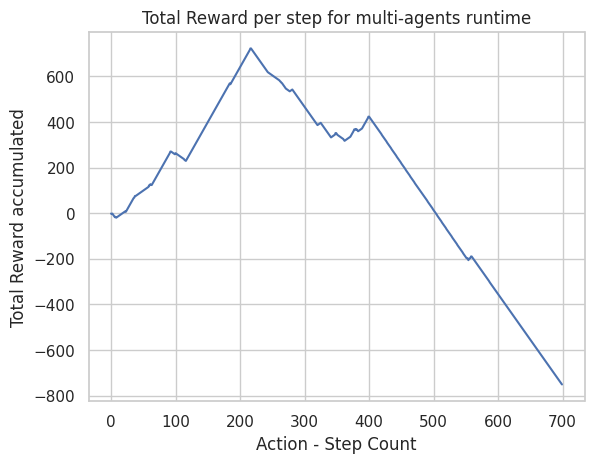

In [ ]:
# Create a line plot with customization
plt.plot(reward_lst[:700], linestyle='-', color='b')

# Add title and labels
plt.title('Total Reward per step for multi-agents runtime')
plt.xlabel('Action - Step Count')
plt.ylabel('Total Reward accumulated')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

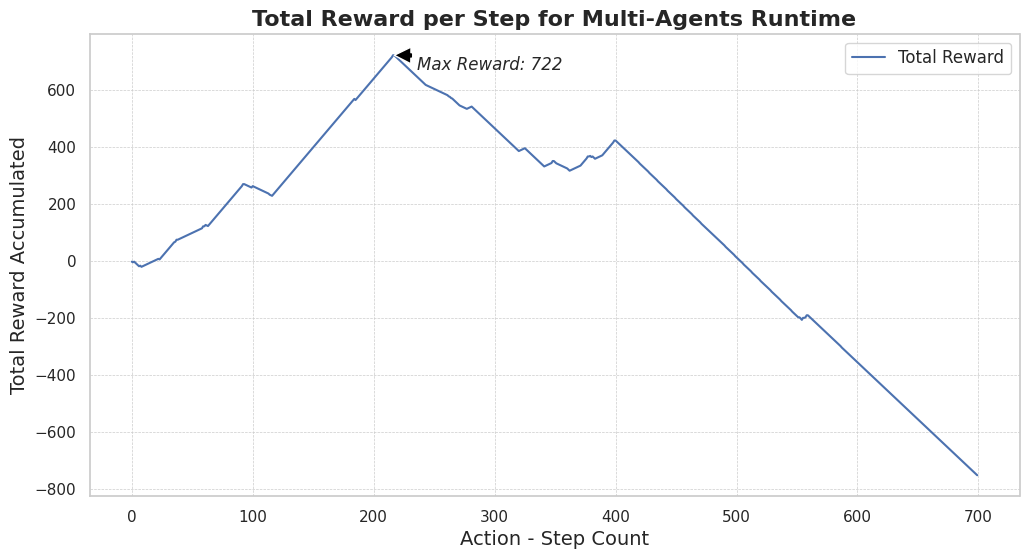

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
# per_ep_reward_list = [i for i in range(700)]  # Replace with your actual data

# Set the seaborn style for aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot with customization
ax.plot(reward_lst[:700], linestyle='-', color='b', label='Total Reward')

# Add title and labels with increased font size
ax.set_title('Total Reward per Step for Multi-Agents Runtime', fontsize=16, fontweight='bold')
ax.set_xlabel('Action - Step Count', fontsize=14)
ax.set_ylabel('Total Reward Accumulated', fontsize=14)

# Add a grid with customized style
ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend
ax.legend(fontsize=12)

# Annotate a specific point, e.g., the maximum reward
max_reward = max(reward_lst[:700])
max_reward_index = reward_lst[:700].index(max_reward)
ax.annotate(f'Max Reward: {max_reward}', xy=(max_reward_index, max_reward), xytext=(max_reward_index + 20, max_reward - 50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, fontstyle='italic')

# Show the plot
plt.show()

#### Bird Traversal On the map

In [ ]:
india_raster[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [ ]:
temp = india_raster

In [ ]:
per_ep_path_lst[1][7]

{'reward': 423,
 'coord_travel': [[(55, 13),
   (55, 14),
   (55, 15),
   (55, 14),
   (55, 15),
   (55, 16),
   (55, 17),
   (55, 18),
   (55, 19),
   (55, 20),
   (55, 21),
   (55, 22),
   (55, 23),
   (55, 24),
   (56, 24),
   (55, 24),
   (55, 25),
   (55, 26),
   (55, 27),
   (55, 28),
   (55, 29),
   (55, 30)]],
 'final_latitude': 23.1359,
 'final_longitude': 76.33509999999993}

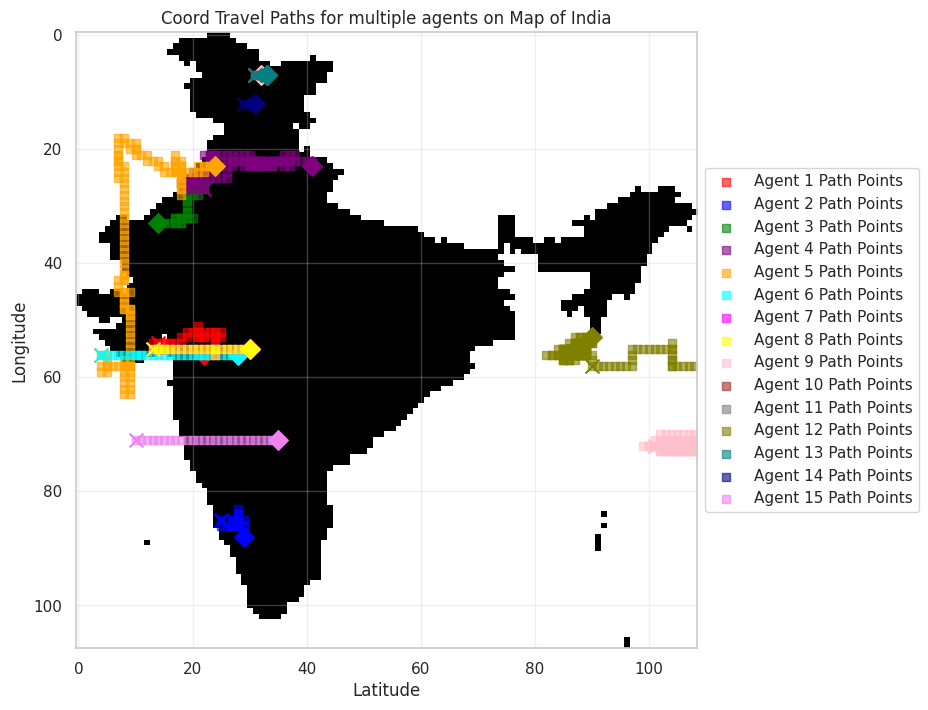

In [ ]:
data_list = per_ep_path_lst[1][:15]

# Initialize the matrix
matrix = temp

# Define colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink',
          'brown', 'gray', 'olive', 'teal', 'navy', 'violet']
# Create a plot
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='Greys', interpolation='nearest')

for idx, data in enumerate(data_list):
    reward = data['reward']
    coord_travel = data['coord_travel'][0]
    final_latitude = data['final_latitude']
    final_longitude = data['final_longitude']

    # Extract x and y coordinates from the list
    x_coords, y_coords = zip(*coord_travel)

    # Plot the points
    plt.scatter(y_coords, x_coords, c=colors[idx], marker=',', label=f'Agent {idx+1} Path Points', alpha=0.6)

    # Mark the starting point
    plt.scatter(y_coords[0], x_coords[0], c=colors[idx], marker='x', s=100)

    # Mark the final point
    plt.scatter(y_coords[-1], x_coords[-1], c=colors[idx], marker='D', s=100)

# Add title and labels
plt.title('Coord Travel Paths for multiple agents on Map of India')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(alpha=0.3)

# Show the plot
plt.show()
